In [14]:
# import the gapminder dataset
from gapminder import gapminder as gap

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [15]:
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [32]:
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [4]:
# importing commonly used modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

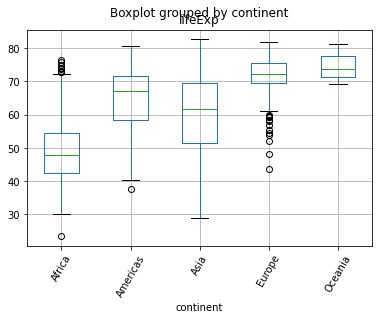

In [23]:
gap.boxplot("lifeExp", "continent", rot = 60)
plt.show()

If there are categorical values in the dataset it is easier to convert them using some encoding or dummies for better handling of the data

In [29]:
# creating dummies
gap_region = pd.get_dummies(gap)
print(gap_region.columns)

Index(['year', 'lifeExp', 'pop', 'gdpPercap', 'country_Afghanistan',
       'country_Albania', 'country_Algeria', 'country_Angola',
       'country_Argentina', 'country_Australia',
       ...
       'country_Vietnam', 'country_West Bank and Gaza', 'country_Yemen, Rep.',
       'country_Zambia', 'country_Zimbabwe', 'continent_Africa',
       'continent_Americas', 'continent_Asia', 'continent_Europe',
       'continent_Oceania'],
      dtype='object', length=151)


In [41]:
from sklearn import datasets

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


imputing any missing or unwanted values as well as using a pipeline to make the process easier.

pipeline makes it easy to run multiple processes simultaneously

In [45]:
# import modules
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# setup the steps to be used in pipeline
steps = [("imputation", SimpleImputer(missing_values = np.nan, strategy = "most_frequent")), ("SVM", SVC())]

# create the pipeline
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         2
        51.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         3
        53.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         0
        59.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         2
        61.0       0.00      0.00      0.00         2
        63.0       0.00      0.00      0.00         3
        64.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         1
        69.0       0.00      0.00      0.00         1
        70.0       0.00      0.00      0.00         1
        71.0       0.00    

Centering and scaling the data

In [46]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [51]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

In [55]:
np.mean(X_scaled), np.std(X_scaled)

(4.66735072755122e-16, 1.0)

In [56]:
np.mean(X), np.std(X)

(69.13366292091617, 215.74620420485243)

In [58]:
# testing pipeline with a standard scalar
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

steps = [("scalar", StandardScaler()), ("knn", KNeighborsClassifier())]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

0.9444444444444444

In [59]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.7222222222222222

In [64]:
# cross validation and scaling in pipeline
from sklearn.model_selection import GridSearchCV
# this will enable parameters to be set for the knn model in the pipeline andnot disturb anything else
steps = [("scalar", StandardScaler()), ("knn", KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = dict(knn__n_neighbors = np.arange(1,50))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 21)
cv = GridSearchCV(pipeline, param_grid= parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)


In [65]:
print(cv.best_params_)

{'knn__n_neighbors': 16}


In [66]:
print(cv.score(X_test, y_test))


0.9722222222222222


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

